# House Pricing Model

## Import Packages and set of data frame

In [1]:
%reset -f

In [54]:
import pandas            as pd
import matplotlib.pyplot as plt
import statsmodels.api   as sm
import seaborn           as sns
import numpy             as np
import csv
import xgboost           as xgb

from scipy.stats                            import t
from datetime                               import datetime
from statsmodels.tsa.stattools              import adfuller
from scipy                                  import stats
from statsmodels.tsa.stattools              import acf
from statsmodels.graphics.tsaplots          import plot_acf
from sklearn.preprocessing                  import StandardScaler
from sklearn.metrics                        import mean_squared_error, mean_absolute_error
from sklearn.model_selection                import GridSearchCV, TimeSeriesSplit, cross_val_score, cross_validate, train_test_split, KFold
from sklearn.neural_network                 import MLPRegressor
from sklearn.ensemble                       import RandomForestRegressor
from sklearn.linear_model                   import LinearRegression, Lasso, RidgeCV, Ridge
from sklearn.metrics                        import r2_score
from sklearn.svm                            import SVR, LinearSVR
from sklearn                                import linear_model

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [177]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df['MSZoning'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

# EDA and Feature Engineering

In [8]:
def one_hot_encode_dataframe(df):
    # Identify object columns
    object_cols = df.select_dtypes(include=['object']).columns
    
    # One-hot encode object columns
    df_encoded = pd.get_dummies(df, columns=object_cols)
    
    return df_encoded


In [10]:
encoded_dataframe = one_hot_encode_dataframe(df)
print(encoded_dataframe)

        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  \
0          2003          2003    

In [20]:
encoded_dataframe = pd.DataFrame(encoded_dataframe)
encoded_dataframe.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [179]:
df = df[['LotArea','OverallQual', 'OverallCond','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold','SalePrice']]

In [16]:
df = encoded_dataframe

In [18]:
# Impute missing values with column means for numerical columns
df = df.fillna(df.mean())

In [181]:
## drop na's
df = df.dropna()

In [19]:
# Check for any NaN or infinite values across rows
df[df.isin([np.nan, np.inf, -np.inf]).any(axis=1)].count().sum()

0

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 290 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(35), uint8(252)
memory usage: 792.9 KB


In [184]:
X = df[['LotArea','OverallQual', 'OverallCond','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold']]

In [29]:
X = df.loc[:, df.columns != 'SalePrice']
X = df.loc[:, df.columns != 'Id']

In [30]:
y = df['SalePrice']

In [31]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Subsetting Data Into 3 Sections

### For a two-step stacked time-series model where the temporal order of the data need to be followed strictly, we split the data into three time-ordered batches.

### The first batch (called the base-training set) is for the Gridsearch hyper-parameter tuning of the base models.

### The optimized base models then make out-of-sample predictions on the next batch of data, which is used to train the meta model (let's call this the meta-training set).

### The fitted meta model then makes out-of-sample predictions on the final batch of data, which is used for scoring the models' performance (called the holdout test set).

In [187]:
# Extract the last 10% of observations as the holdout-test set
#df_holdout = df.iloc[-4380:]
#df_rest = df.iloc[:-4380]

In [188]:
#y_test = y_test.pop('SalePrice')

In [189]:
#y = df_rest.pop('Sale Price')

In [190]:
#X = df_rest

### The remaining training data is split into 2/3 base-training and 1/3 meta-training sets.

In [33]:
c = len(y)/3

In [34]:
# Data is organized in declining chronological order
y_meta = y_train[-int(c):]
y_base = y_train[:-int(c)]

In [35]:
X_meta = X_train[-int(c):]
X_base = X_train[:-int(c)]

## Train Models

In [36]:
scaler = StandardScaler()

In [37]:
X_base = scaler.fit_transform(X_base)
X_meta = scaler.transform(X_meta)
X_test = scaler.transform(X_test)

In [38]:
#Make an inner validation scheme for Gridsearch Cross-Validation
# adopt appropriate CV split
#time_split_inner = TimeSeriesSplit(n_splits = 3)

cv = KFold(n_splits=2, random_state=None, shuffle=False)

### Lasso Regression

In [39]:
lasso = Lasso(fit_intercept=1, alpha=0.05, max_iter=10000, random_state=0)

las_params = {'fit_intercept': [1, 0],
              'alpha': [0.005, 0.01, 0.03, 0.05, 0.07, 0.1]}

In [40]:
gs_las = GridSearchCV(lasso, las_params, cv=cv, scoring='neg_mean_squared_error', 
                      n_jobs=-1, verbose=1)

gs_las.fit(X_base, y_base)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=KFold(n_splits=2, random_state=None, shuffle=False),
             estimator=Lasso(alpha=0.05, fit_intercept=1, max_iter=10000,
                             random_state=0),
             n_jobs=-1,
             param_grid={'alpha': [0.005, 0.01, 0.03, 0.05, 0.07, 0.1],
                         'fit_intercept': [1, 0]},
             scoring='neg_mean_squared_error', verbose=1)

### Two-Layer Neural Network

In [41]:
#mlp = MLPRegressor(hidden_layer_sizes=(24,), alpha=1e-6, activation='relu', early_stopping=True, max_iter=20000, random_state=0)

#mlp_params = {'hidden_layer_sizes': [(24,), (36,), (24,24), (24,12), (36,24), (36,12)], 
#              'alpha': [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3],
#              'activation': ['relu', 'identity', 'tanh']}

In [42]:
#gs_mlp = GridSearchCV(mlp, mlp_params, cv=cv, scoring='neg_mean_squared_error', 
#                      n_jobs=-1, verbose=1)

#gs_mlp.fit(X_base, y_base)

### Random Forest

In [43]:
rf = RandomForestRegressor(n_estimators=400, min_samples_split=3, max_features='sqrt', random_state=0)

rf_params = {'n_estimators': range(300, 500, 25),
             'min_samples_split': [2, 3, 4, 5, 6, 7],
             'max_features': ['log2', 'sqrt']}

In [44]:
gs_rf = GridSearchCV(rf, rf_params, cv=cv, scoring = 'neg_mean_squared_error', 
                     n_jobs=-1, verbose=1)

gs_rf.fit(X_base, y_base)

Fitting 2 folds for each of 96 candidates, totalling 192 fits


GridSearchCV(cv=KFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(max_features='sqrt',
                                             min_samples_split=3,
                                             n_estimators=400, random_state=0),
             n_jobs=-1,
             param_grid={'max_features': ['log2', 'sqrt'],
                         'min_samples_split': [2, 3, 4, 5, 6, 7],
                         'n_estimators': range(300, 500, 25)},
             scoring='neg_mean_squared_error', verbose=1)

### XGBoost

In [45]:
xgb = xgb.XGBRegressor(n_estimators=100, gamma=200, eta=0.1, subsample=1, objective='reg:squarederror', random_state=0)

xgb_params = {'n_estimators': range(70, 140, 10),
              'subsample': [0.5, 0.75, 1],
              'eta': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4],
              'gamma': range(150, 160, 10)}

# gamma range changed from 150-310 to 150-160

In [46]:
gs_xgb = GridSearchCV(xgb, xgb_params, cv=cv, scoring = 'neg_mean_squared_error', n_jobs=-1, verbose=1)

gs_xgb.fit(X_base, y_base)

Fitting 2 folds for each of 126 candidates, totalling 252 fits


GridSearchCV(cv=KFold(n_splits=2, random_state=None, shuffle=False),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eta=0.1,
                                    eval_metric=None, gamma=200, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_c...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                 

### Linear Support Vector Regression

In [47]:
svr = LinearSVR(epsilon=10, C=35, fit_intercept=True, loss='squared_epsilon_insensitive', 
                max_iter=30000, random_state=8)

svr_params = {'epsilon': [8, 9, 10, 11, 12, 13, 14],
              'fit_intercept': [0, 1],
              'C': [33, 34, 35, 36, 37, 38, 39, 40, 41]}

In [48]:
gs_svr = GridSearchCV(svr, svr_params, cv=cv, scoring = 'neg_mean_squared_error', 
                      n_jobs=-1, verbose=1)

gs_svr.fit(X_base, y_base)

Fitting 2 folds for each of 126 candidates, totalling 252 fits


GridSearchCV(cv=KFold(n_splits=2, random_state=None, shuffle=False),
             estimator=LinearSVR(C=35, epsilon=10,
                                 loss='squared_epsilon_insensitive',
                                 max_iter=30000, random_state=8),
             n_jobs=-1,
             param_grid={'C': [33, 34, 35, 36, 37, 38, 39, 40, 41],
                         'epsilon': [8, 9, 10, 11, 12, 13, 14],
                         'fit_intercept': [0, 1]},
             scoring='neg_mean_squared_error', verbose=1)

### Support Vector Machine (Regression)

In [207]:
#svm = SVR(kernel='rbf', gamma='auto', C=0.1, max_iter=30000)

#svm_params = {'kernel': ['rbf', 'sigmoid', 'poly'],
#              'gamma': ['scale', 'auto', 0.2], 
#              'C': [0.05, 0.07, 0.1, 0.2, 0.3, 0.4, 0.5]}

In [208]:
#gs_svm = GridSearchCV(svm, svm_params, cv=cv, scoring = 'neg_mean_squared_error', 
#                      n_jobs=-1, verbose=1)

#gs_svm.fit(X_base, y_base)

Fitting 2 folds for each of 63 candidates, totalling 126 fits


GridSearchCV(cv=KFold(n_splits=2, random_state=None, shuffle=False),
             estimator=SVR(C=0.1, gamma='auto', max_iter=30000), n_jobs=-1,
             param_grid={'C': [0.05, 0.07, 0.1, 0.2, 0.3, 0.4, 0.5],
                         'gamma': ['scale', 'auto', 0.2],
                         'kernel': ['rbf', 'sigmoid', 'poly']},
             scoring='neg_mean_squared_error', verbose=1)

## Test Models

In [49]:
gs_las.best_params_
#gs_mlp.best_params_
gs_rf.best_params_
gs_xgb.best_params_
gs_svr.best_params_
#gs_svm.best_params_

{'C': 34, 'epsilon': 11, 'fit_intercept': 1}

In [50]:
est_meta = pd.DataFrame(y_meta)
#y_meta = est_meta.pop('target')

In [51]:
est_meta['las_pred'] = gs_las.predict(X_meta)
#est_meta['mlp_pred'] = gs_mlp.predict(X_meta)
est_meta['rf_pred'] = gs_rf.predict(X_meta)
est_meta['xgb_pred'] = gs_xgb.predict(X_meta)
est_meta['svr_pred'] = gs_svr.predict(X_meta)
#est_meta['svm_pred'] = gs_svm.predict(X_meta)

In [52]:
#est_meta = est_meta[['las_pred','mlp_pred','rf_pred','xgb_pred','svr_pred','svm_pred']]
est_meta = est_meta[['las_pred','rf_pred','xgb_pred','svr_pred']]

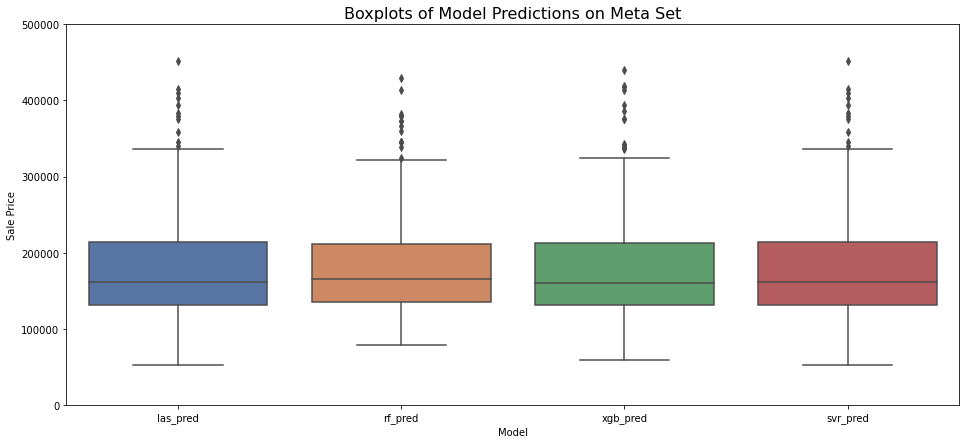

In [53]:
plt.figure(figsize=(16,7))

ax=sns.boxplot(data=est_meta, orient='v', palette = sns.color_palette("deep", 5))
ax.set(ylim=(0, 500000))

plt.title('Boxplots of Model Predictions on Meta Set', fontsize=16)
plt.xlabel('Model')
plt.ylabel('Sale Price');

In [214]:
#meta = LinearRegression()

In [55]:
# ridge parameter grid
param_grid = {
    'alpha': [0.1, 1.0, 10.0],        
    'fit_intercept': [True, False],  
    'normalize': [True, False],      
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],  
    'random_state': [42]            
}

In [56]:
# Create Ridge Regression model
meta_mod = Ridge()

# Create the GridSearchCV object
meta = GridSearchCV(meta_mod, param_grid, cv=5, scoring='neg_mean_squared_error')

In [57]:
meta.fit(est_meta, y_meta)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1.0, 10.0],
                         'fit_intercept': [True, False],
                         'normalize': [True, False], 'random_state': [42],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']},
             scoring='neg_mean_squared_error')

In [58]:
reg_dict = {
    'Lasso Regression': gs_las,
    #'Multi-Layer Perceptron': gs_mlp, 
    'Random Forest': gs_rf,
    'XG Boost': gs_xgb,
    'Support Vector Regression' : gs_svr
    #, 'Support Vector Machine' : gs_svm
}

In [59]:
def reg_scoring(X, y, meta, reg_dict):
   
    test1_scores = []
    test2_scores = []
    test3_scores = []
    
    df_pred = pd.DataFrame(columns=reg_dict.keys()) # Columns of DF will accord with reg_dict keys
    
    # Loop through Dictionary items
    for key, reg in reg_dict.items():
        
        pred_y = reg.predict(X)
        df_pred[key] = pd.Series(pred_y).transpose()
        
        # Computing test scores for each model
        test1_scores.append(round(mean_absolute_error(y, pred_y), 4))
        test2_scores.append(round(mean_squared_error(y, pred_y, squared=False), 4))
        test3_scores.append(round(r2_score(y, pred_y), 4))
                            
    # Generate results DataFrame
    results = pd.DataFrame({'Model': list(reg_dict.keys()), 
                            'Mean Absolute Error': test1_scores,
                            'Root Mean Squared Error': test2_scores,
                            'R-Squared': test3_scores
                            })

    # Generate Stack Model's predictions, and test scores
    df_pred['Stack Model'] = meta.predict(df_pred) # Adding 'Stack Model' to DataFrame of predictions
    
    s1 = round(mean_absolute_error(y, df_pred['Stack Model']), 4)
    s2 = round(mean_squared_error(y, df_pred['Stack Model'], squared=False), 4)
    s3 = round(r2_score(y, df_pred['Stack Model']), 4)
    
    # Add target variable to the DataFrame of predictions
    df_pred['Target'] = y.tolist()
        
        
    # Inserting the Stack scores to the results DataFrame
    row1 = ['Stack Model', s1, s2, s3]
    results.loc[len(results)] = row1
    
    return results, df_pred

In [60]:
scores, df_pred = reg_scoring(X_test, y_test, meta, reg_dict)

In [61]:
scores

,Model,Mean Absolute Error,Root Mean Squared Error,R-Squared
0,Lasso Regression,136.6843,542.2587,1.0000
1,Random Forest,13629.6244,26881.9014,0.9040
2,XG Boost,1938.6909,6546.1140,0.9943
3,Support Vector Regression,18.5360,25.4540,1.0000
4,Stack Model,13.9500,23.9479,1.0000


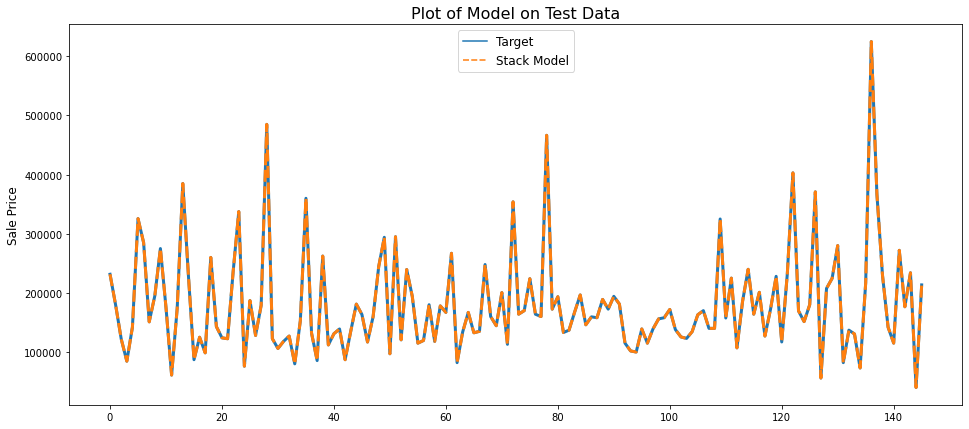

In [73]:
fig, ax = plt.subplots(figsize=(16,7))

sns.lineplot(data=df_pred[['Target', 'Stack Model']], ax=ax, linewidth=3)
plt.legend(loc='upper center', fontsize=12)
plt.title('Plot of Model on Test Data', fontsize=16)
plt.xlabel('')
plt.ylabel('Sale Price', fontsize=12);

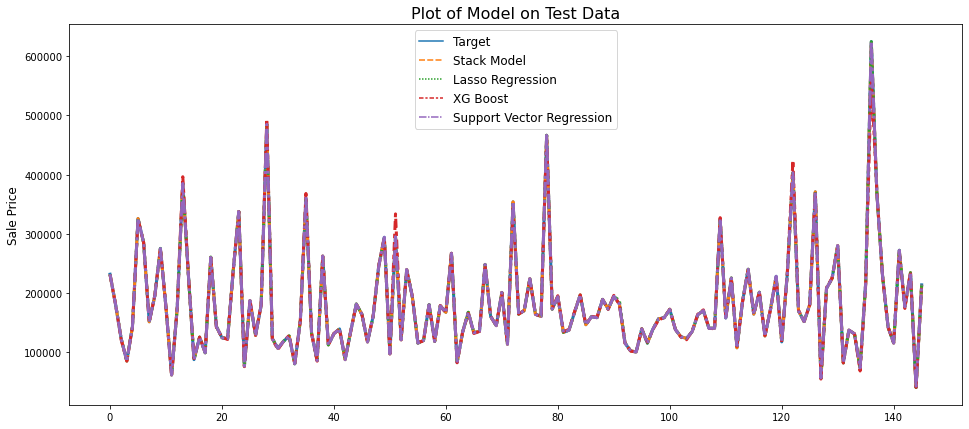

In [66]:
fig, ax = plt.subplots(figsize=(16,7))

sns.lineplot(data=df_pred[['Target', 'Stack Model','Lasso Regression', 'XG Boost','Support Vector Regression']], ax=ax, linewidth=3)
plt.legend(loc='upper center', fontsize=12)
plt.title('Plot of Model on Test Data', fontsize=16)
plt.xlabel('')
plt.ylabel('Sale Price', fontsize=12);

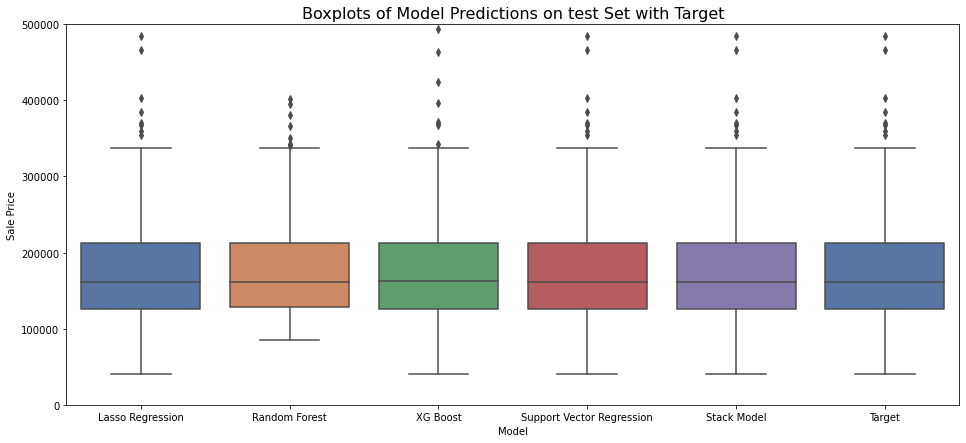

In [67]:
plt.figure(figsize=(16,7))

ax=sns.boxplot(data=df_pred, orient='v', palette = sns.color_palette("deep", 5))
ax.set(ylim=(0, 500000))

plt.title('Boxplots of Model Predictions on test Set with Target', fontsize=16)
plt.xlabel('Model')
plt.ylabel('Sale Price');

## Predictions

In [229]:
### Input new data's figures into dataframe
new_test_df = pd.read_csv('test.csv')

In [230]:
new_test_x = new_test_df[['LotArea','OverallQual', 'OverallCond','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold']]

In [231]:
### Re-run this cell to make prediction


In [232]:
### run scores
